In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin

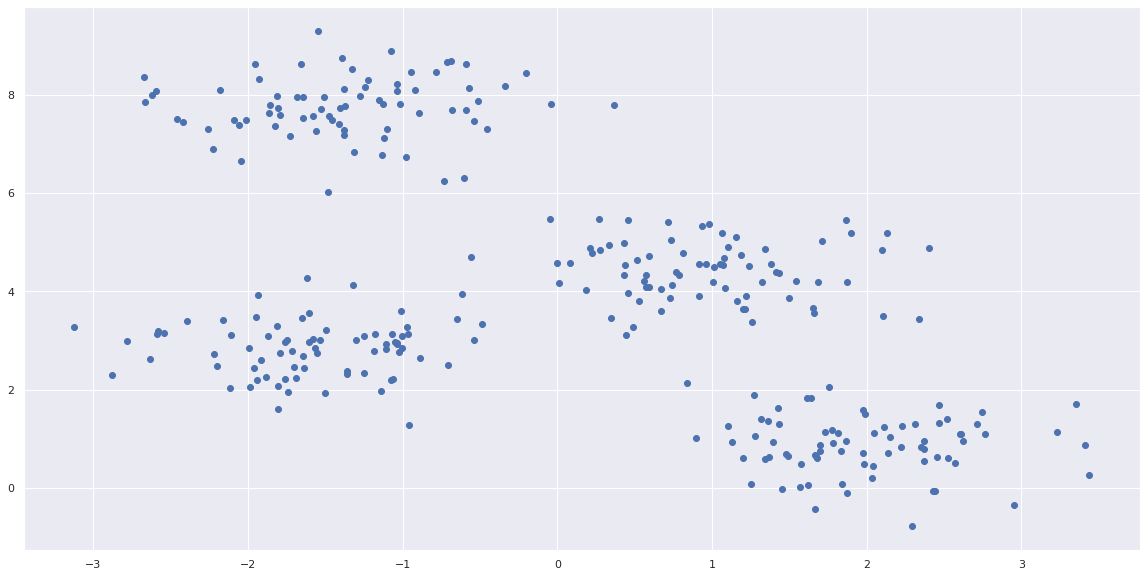

In [ ]:
X, Y = make_blobs(n_samples=300,centers=4,cluster_std=0.6, random_state=0)
plt.figure(figsize=(20, 10))
plt.scatter(X[:,0],X[:,1])
plt.show()

In [ ]:
def find_clusters(X, clusters, seed=0):
    r = np.random.RandomState(seed)
    k = r.permutation(X)[:clusters]
    list_of_centers = []
    for idx in range(len(k)):
          list_of_centers.append(k[idx])    
    list_of_centers = np.array(list_of_centers)
    convergence = False
    while not convergence:
        labels =pairwise_distances_argmin(X,list_of_centers)
        new_centers = np.zeros((4, 2))
        for i in range(len(list_of_centers)):
            new_centers[i][0], new_centers[i][1] = get_centerpoints(labels,X,i)
        if ((new_centers==list_of_centers).all()):
            convergence = True
        else:
            list_of_centers = new_centers
    return list_of_centers, labels

In [ ]:
def get_centerpoints(labels,X,i):
    i_index=np.where(labels == i)
    i_indexinX= X[i_index]
    new_centers_1 = i_indexinX.mean(0)[0]
    new_centers_2 = i_indexinX.mean(0)[1]
    return new_centers_1,new_centers_2

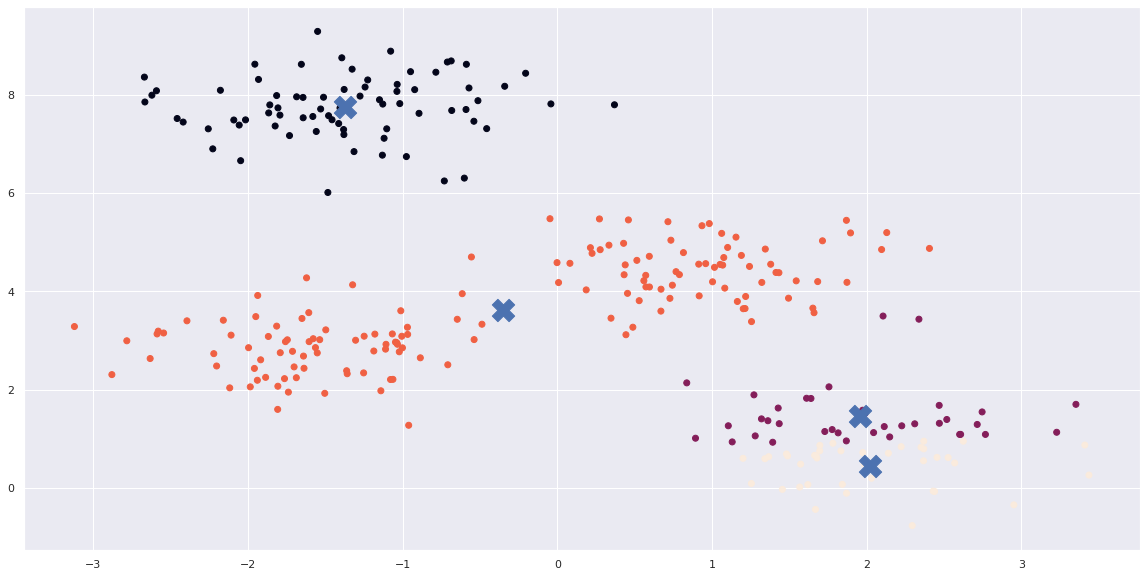

In [ ]:
centers, labels = find_clusters(X,4,0)
plt.figure(figsize=(20, 10))
plt.scatter(X[:,0],X[:,1],c=labels)
plt.scatter(centers[:, 0],centers[:, 1],marker='X',s=500)
plt.show()

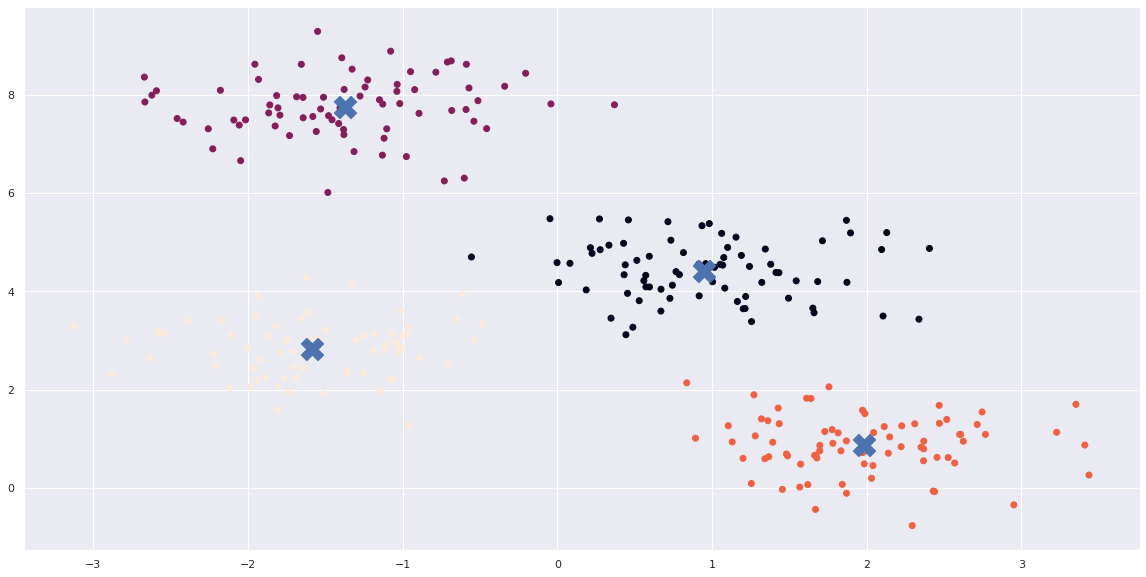

In [ ]:
centers, labels = find_clusters(X,4,2)
plt.figure(figsize=(20, 10))
plt.scatter(X[:,0],X[:,1],c=labels)
plt.scatter(centers[:, 0],centers[:, 1],marker='X',s=500)
plt.show()

There is significant difference between different seed kmeans plots. This is because normal kmeans algorithm is heavily reliant on initial starting positions, thus different seeds has a high chance of creating vastly different categorizations.

In [ ]:
def calc_euclidean_distance(X, centers):
    datapoints_distance_from_centers = []
    for i in X:
        centerpoint = []
        for c in centers:
            euclidean_distance= np.sum((c - i)**2)
            centerpoint.append(euclidean_distance)
        datapoints_distance_from_centers.append(np.array(min(centerpoint)))
    return datapoints_distance_from_centers

In [ ]:
def calc_probab(datapoints_distance_from_centers):
    datapoints_probabilities = []
    for i in datapoints_distance_from_centers:
        datapoints_probabilities.append(np.array(np.square(i))/np.array(np.sum(np.square(datapoints_distance_from_centers))))
    return datapoints_probabilities

In [ ]:
def init_center(k,X,seed):
    centers=[]
    r = np.random.RandomState(seed)
    initial_center = r.permutation(X)[np.random.randint(0,len(X))]
    centers.append(initial_center)
    while(len(centers)<k):
        datapoints_distance_from_centers=calc_euclidean_distance(X, centers)
        datapoints_probabilities=calc_probab(datapoints_distance_from_centers)
        j = np.random.choice(len(X),p=datapoints_probabilities)
        new_center = X[j]
        centers.append(new_center)
    all_centers = np.zeros((4,2))
    for i in range(len(centers)):
        all_centers[i][0] = centers[i][0]
        all_centers[i][1] = centers[i][1]
    return all_centers

In [ ]:
def kmpp(X, clusters, seed=0):
    initial_centers = init_center(clusters,X,seed)
    convergence = False
    while not convergence:
        label = pairwise_distances_argmin(X,initial_centers)
        new_centers = np.zeros((4,2))
        for i in range(len(initial_centers)):
            new_centers[i][0],new_centers[i][1] = get_centerpoints(label,X,i)
        if ((new_centers==initial_centers).all()):
            convergence = True
        else:
            initial_centers = new_centers
    return initial_centers,label

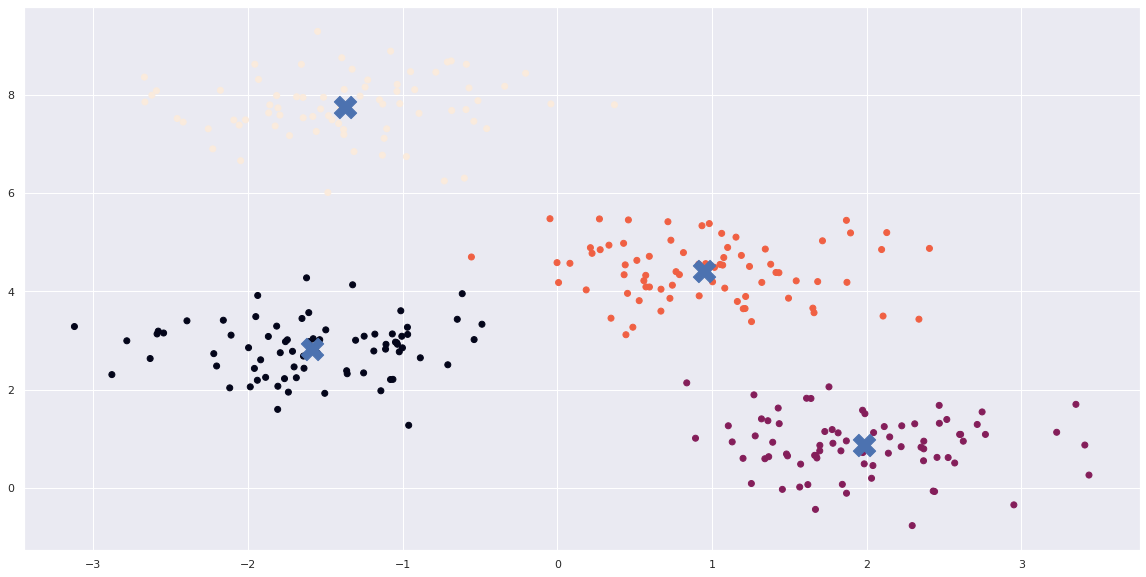

In [ ]:
centers, labels = kmpp(X,4,0)
plt.figure(figsize=(20, 10))
plt.scatter(X[:,0],X[:,1],c=labels)
plt.scatter(centers[:, 0],centers[:, 1],marker='X',s=500)
plt.show()

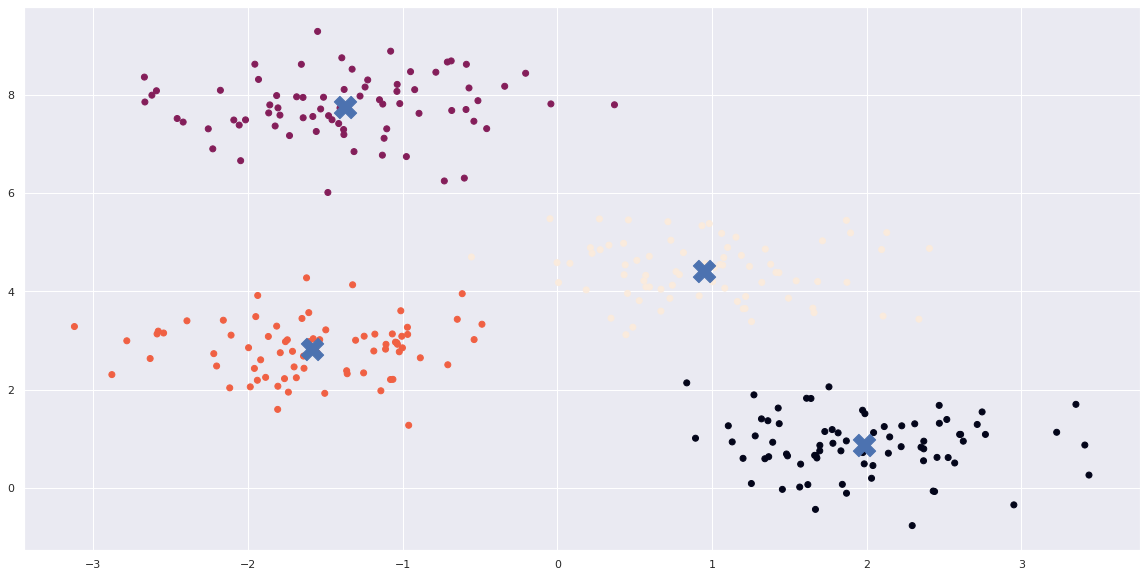

In [ ]:
centers, labels = kmpp(X,4,2)
plt.figure(figsize=(20, 10))
plt.scatter(X[:,0],X[:,1],c=labels)
plt.scatter(centers[:, 0],centers[:, 1],marker='X',s=500)
plt.show()

There is little difference between the two kpp algorithms as kpp is supposed to mitigate the issue of "heavily-reliant on the randomized starting position" that kmeans algorithm has. In other words, kpp should ideally generate the same centers regardless of the initial seed.

The initial kmeans with seed 0 produced centers of questionable quality, with the bottom right cluster being divided into two different categories. The kmeans with seed 2 luckily produced better-looking centers, but it is unclear if this is by pure luck or thanks to some specialty of the number 2. The kpp both produced identical and great-looking centers, as per design of the kpp which attempts to categorize properly regardless of initial random seed.